In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import pickle
%matplotlib inline

In [ ]:
# Source - https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh
train=pd.read_excel('Data_Train.xlsx')
sample = pd.read_excel('Sample_submission.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test = pd.concat([test,sample],axis=1)

In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [ ]:
train.shape,test.shape,train.shape[0]/(train.shape[0]+test.shape[0])*100

((10683, 11), (2671, 11), 79.99850232140183)

In [ ]:
df= pd.concat([train,test])
df.shape

(13354, 11)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Feature Engineering

In [ ]:
# Droping columns that does not seem practical to ask to a customer.
df.drop(labels=['Route','Arrival_Time','Additional_Info'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302


In [ ]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,4746
IndiGo,2564
Air India,2192
Multiple carriers,1543
SpiceJet,1026
Vistara,608
Air Asia,405
GoAir,240
Multiple carriers Premium economy,16


In [ ]:
df['Source'].value_counts()

,count
Source,
Delhi,5682
Kolkata,3581
Banglore,2752
Mumbai,883
Chennai,456


In [ ]:
df['Destination'].value_counts()

,count
Destination,
Cochin,5682
Banglore,3581
Delhi,1582
New Delhi,1170
Hyderabad,883
Kolkata,456


In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Dep_Time,0
Duration,0
Total_Stops,1
Price,0


In [ ]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(13354, 8)
(13353, 8)


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302


In [ ]:
df['Day']= df['Date_of_Journey'].str.split('/').str[0]
df['Month']= df['Date_of_Journey'].str.split('/').str[1]
df['Year']= df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,01,03,2019


In [ ]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-','0 ')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,0 stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,01,03,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13353 non-null  object
 1   Date_of_Journey  13353 non-null  object
 2   Source           13353 non-null  object
 3   Destination      13353 non-null  object
 4   Dep_Time         13353 non-null  object
 5   Duration         13353 non-null  object
 6   Total_Stops      13353 non-null  object
 7   Price            13353 non-null  int64 
 8   Day              13353 non-null  object
 9   Month            13353 non-null  object
 10  Year             13353 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


In [ ]:
df['Stops'] = df['Total_Stops'].str.split().str[0]
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Day,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,0 stop,3897,24,03,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,05,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882,9,06,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,05,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,01,03,2019,1


In [ ]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,0 stop,3897,24,03,2019,0,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,05,2019,2,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882,9,06,2019,2,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,05,2019,1,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,01,03,2019,1,16,50


In [ ]:
#Converting the datatype o newly created features
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Stops'] = df['Stops'].astype(int)
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           13353 non-null  object
 1   Date_of_Journey   13353 non-null  object
 2   Source            13353 non-null  object
 3   Destination       13353 non-null  object
 4   Dep_Time          13353 non-null  object
 5   Duration          13353 non-null  object
 6   Total_Stops       13353 non-null  object
 7   Price             13353 non-null  int64 
 8   Day               13353 non-null  int64 
 9   Month             13353 non-null  int64 
 10  Year              13353 non-null  int64 
 11  Stops             13353 non-null  int64 
 12  Departure_Hour    13353 non-null  int64 
 13  Departure_Minute  13353 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 2.0+ MB


In [ ]:
print(df.Year.value_counts().index)
print("All data is of year 2019")

Index([2019], dtype='int64', name='Year')
All data is of year 2019


In [ ]:
df.Airline.value_counts().index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object', name='Airline')

In [ ]:
source_dict = {y:x for x,y in enumerate(df.Source.value_counts().index.sort_values())}
source_dict

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}

In [ ]:
df.Destination.value_counts().index.sort_values()

Index(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'], dtype='object', name='Destination')

In [ ]:
destination_dict = {'Banglore':0,'Cochin':1,'Delhi':2,'Kolkata': 3,'Hyderabad':4,'New Delhi':5}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline_Encoded']= le.fit_transform(df['Airline'].values)

df3 = df[['Airline']].copy()
df3['Encoded']=df['Airline_Encoded']
df3=df3.drop_duplicates('Airline').reset_index().iloc[:,1:]
d5=df3.Airline.values
d6=df3.Encoded.values
airline_dict = dict(zip(d5,d6))

print(airline_dict)

{'IndiGo': 3, 'Air India': 1, 'Jet Airways': 4, 'SpiceJet': 8, 'Multiple carriers': 6, 'GoAir': 2, 'Vistara': 10, 'Air Asia': 0, 'Vistara Premium economy': 11, 'Jet Airways Business': 5, 'Multiple carriers Premium economy': 7, 'Trujet': 9}


In [ ]:
df['Source_Encoded']=df['Source'].map(source_dict)
df['Destination_Encoded']=df['Destination'].map(destination_dict)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,0 stop,3897,24,3,2019,0,22,20,3,0,5
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,5,2019,2,5,50,1,3,0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882,9,6,2019,2,9,25,4,2,1
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,5,2019,1,18,5,3,3,0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,1,3,2019,1,16,50,3,0,5


In [ ]:
def convert_time(time_str):
    hour = int(time_str[:2])

    if 5 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 16:
        return "Afternoon"
    elif 17 <= hour <= 20:
        return "Evening"
    else:
        return "Night"

df['Dep_Time']=df['Dep_Time'].apply(convert_time)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,IndiGo,24/03/2019,Banglore,New Delhi,Night,2h 50m,0 stop,3897,24,3,2019,0,22,20,3,0,5
1,Air India,1/05/2019,Kolkata,Banglore,Morning,7h 25m,2 stops,7662,1,5,2019,2,5,50,1,3,0
2,Jet Airways,9/06/2019,Delhi,Cochin,Morning,19h,2 stops,13882,9,6,2019,2,9,25,4,2,1
3,IndiGo,12/05/2019,Kolkata,Banglore,Evening,5h 25m,1 stop,6218,12,5,2019,1,18,5,3,3,0
4,IndiGo,01/03/2019,Banglore,New Delhi,Afternoon,4h 45m,1 stop,13302,1,3,2019,1,16,50,3,0,5


Exploratory Data Analysis

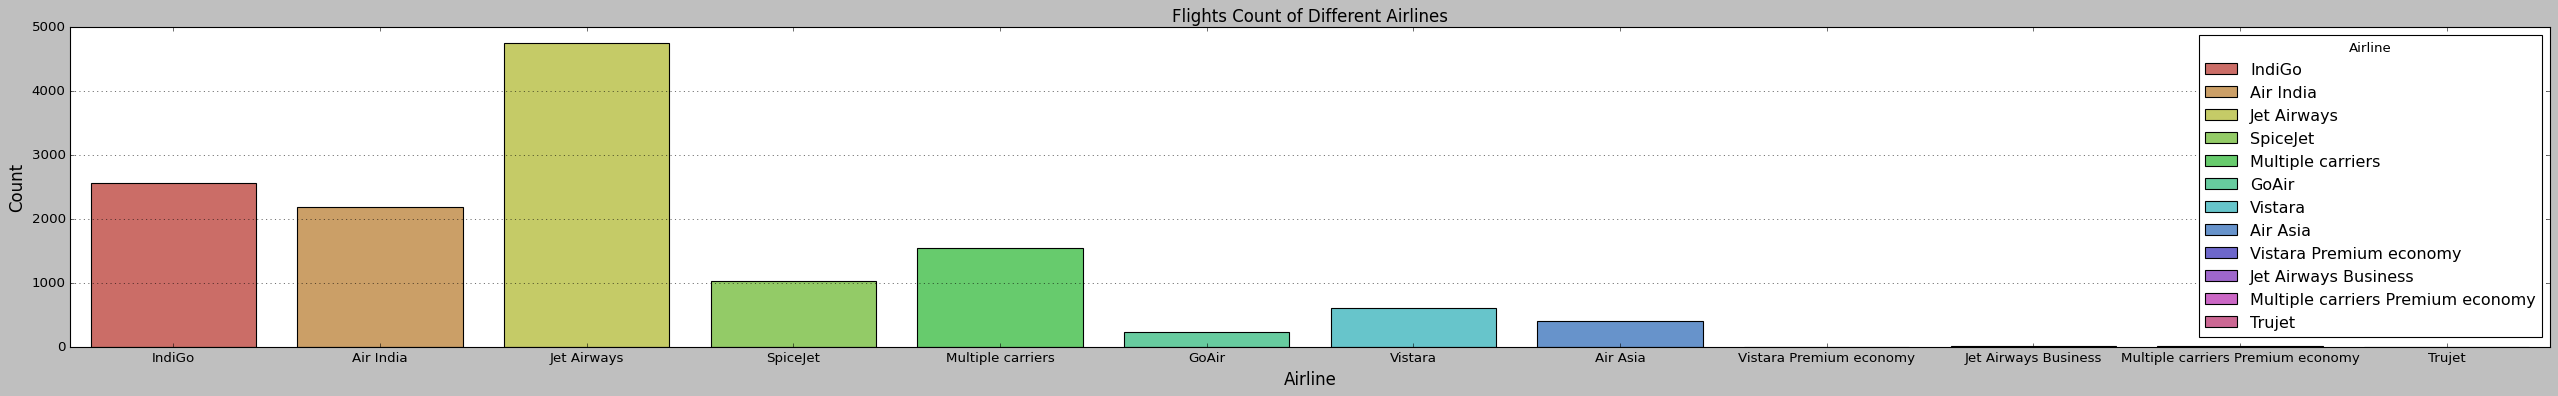

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.figure(figsize=(40,5))
plt.grid(visible=None, which='major', axis='both')
sns.countplot(x="Airline", data=df, hue=df['Airline'], palette="hls", legend=True)
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

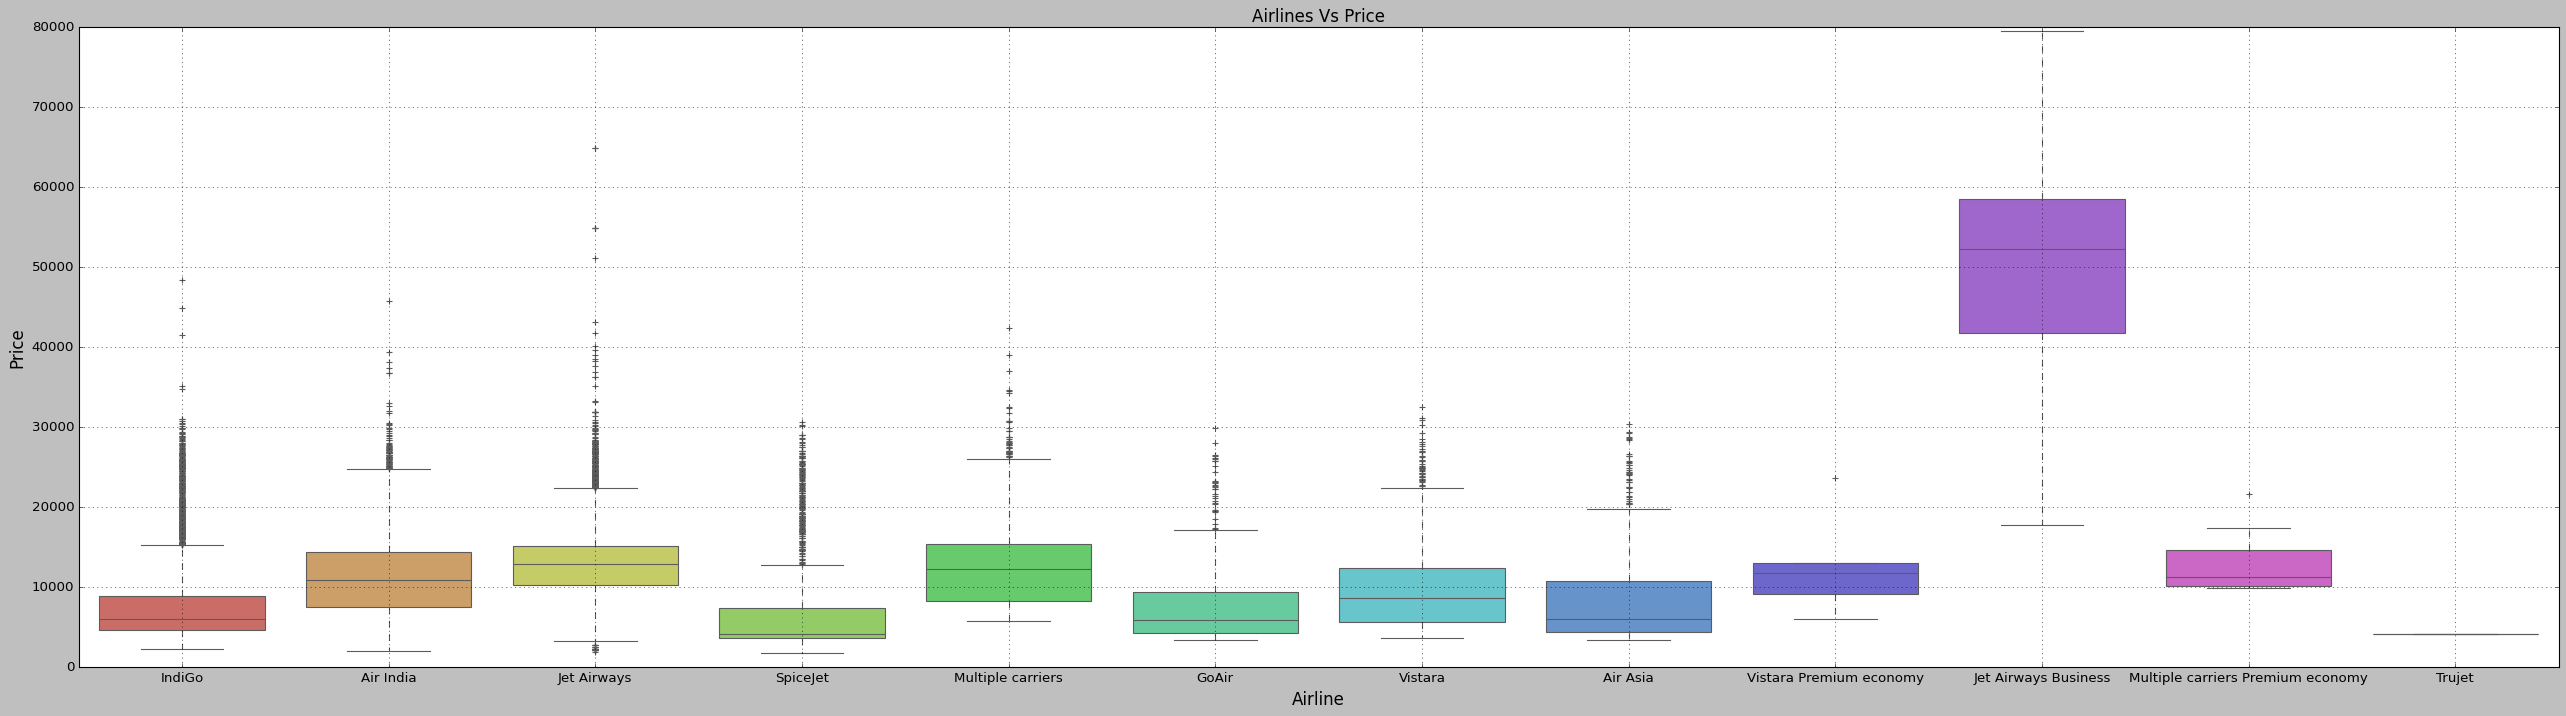

In [ ]:
plt.figure(figsize=(40,10))
sns.boxplot(x=df['Airline'], y=df['Price'], hue=df['Airline'], palette='hls', legend=False)
plt.grid(visible=None, which='major', axis='both')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

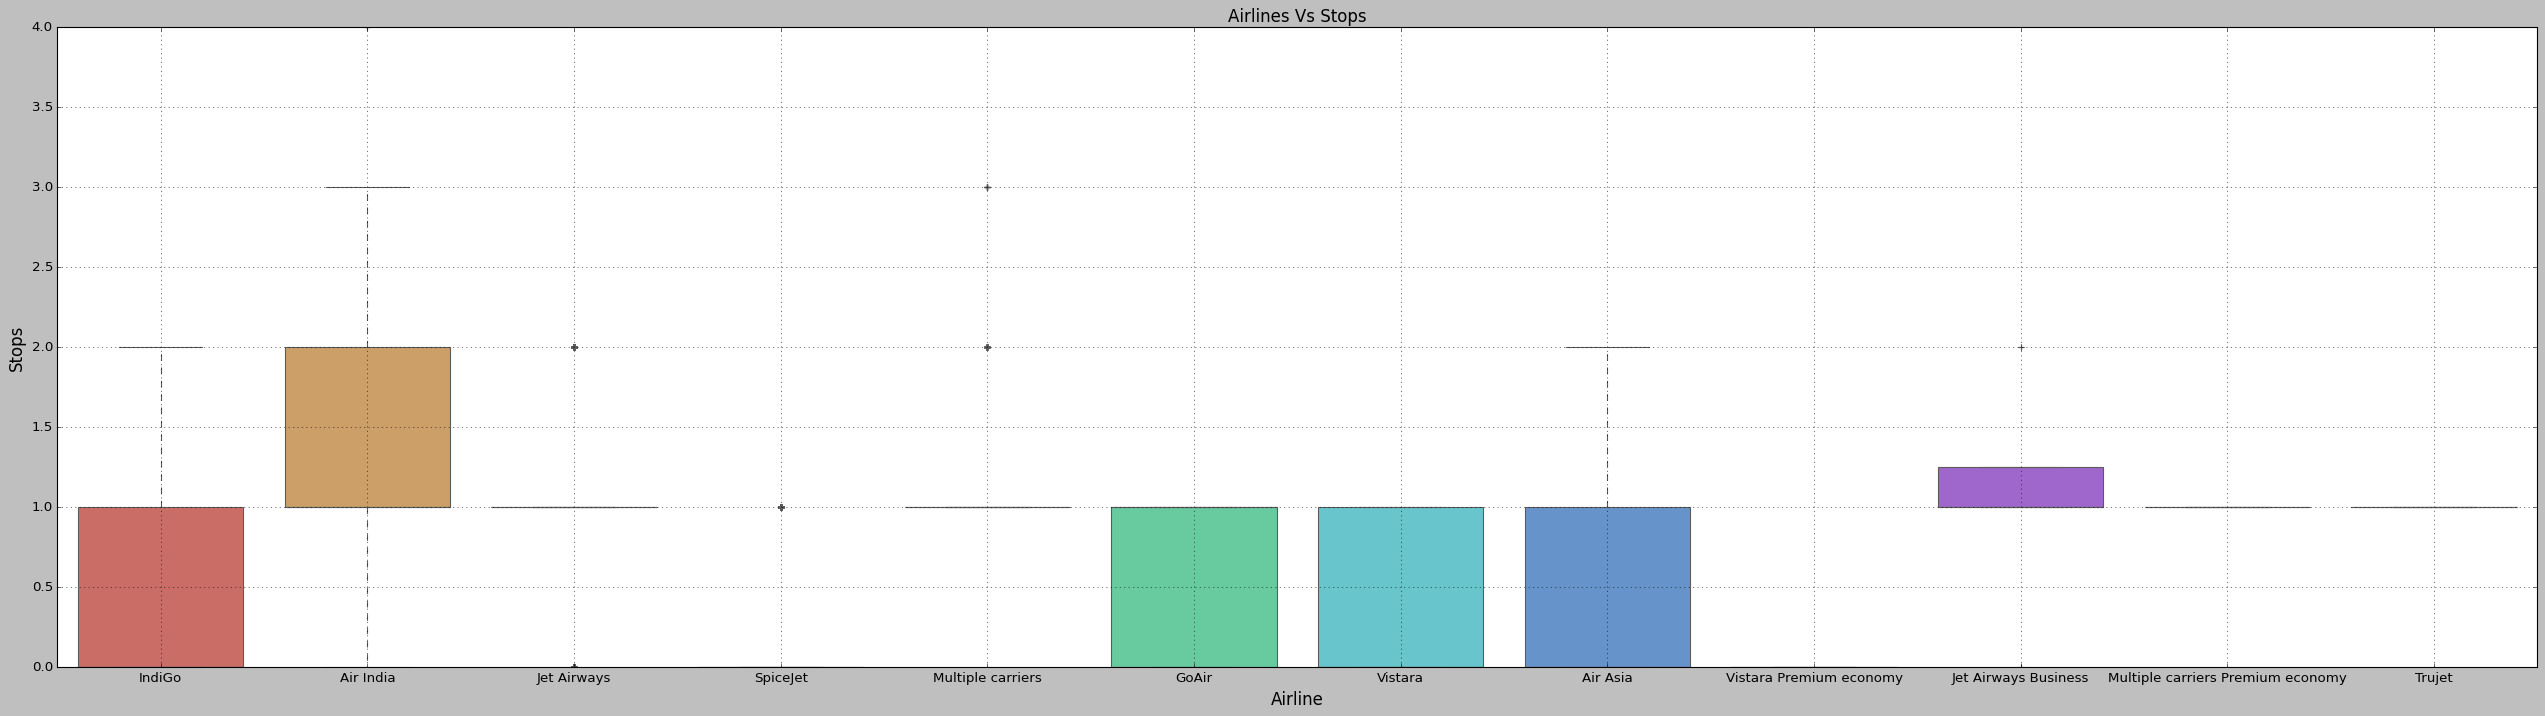

In [ ]:
plt.figure(figsize=(40,10))
sns.boxplot(x=df['Airline'], y=df['Stops'], hue=df['Airline'], palette='hls', legend=False)
plt.grid(visible=None, which='major', axis='both')
plt.title('Airlines Vs Stops',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Stops',fontsize=15)
plt.show()

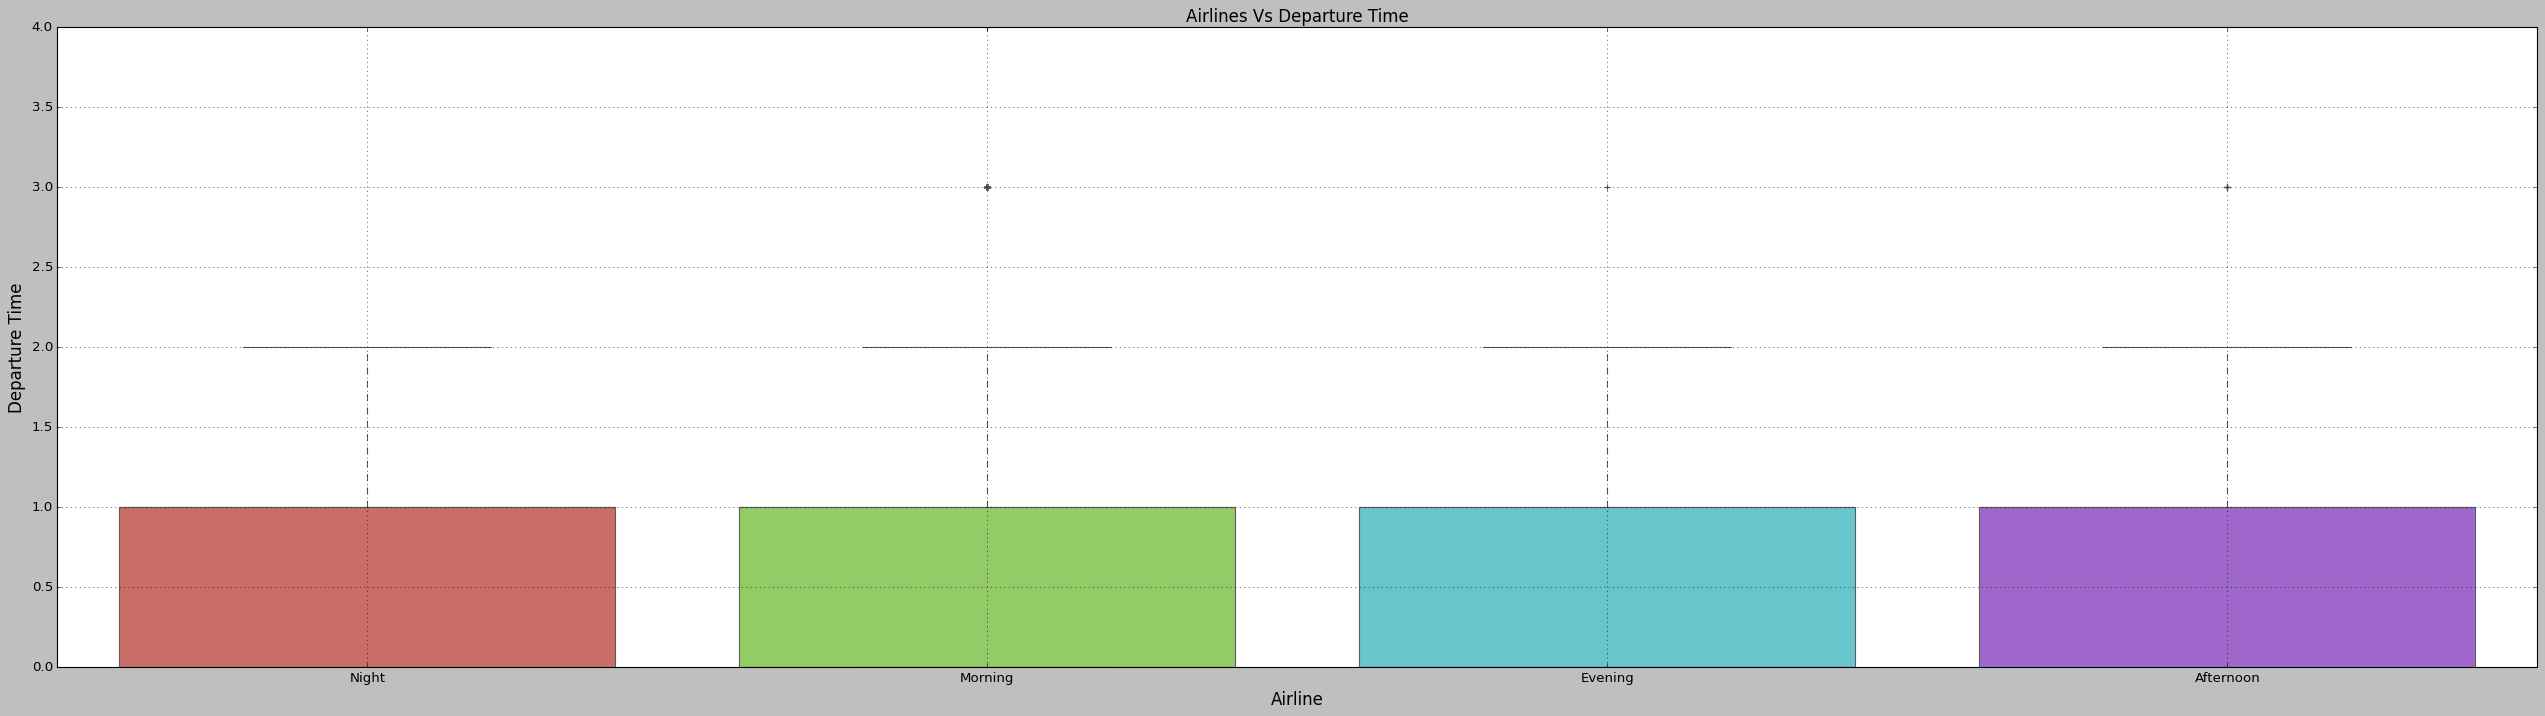

In [ ]:
plt.figure(figsize=(40,10))
sns.boxplot(x=df['Dep_Time'], y=df['Stops'], hue=df['Dep_Time'], palette='hls', legend=False)
plt.grid(visible=None, which='major', axis='both')
plt.title('Airlines Vs Departure Time',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Departure Time',fontsize=15)
plt.show()

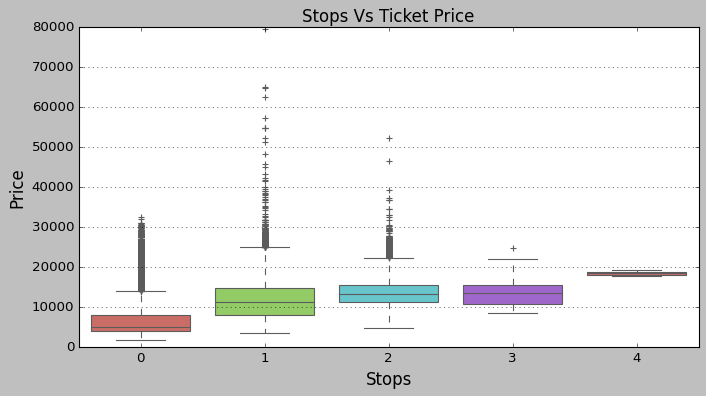

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(visible=None, which='major', axis='both')
sns.boxplot(x=df['Stops'], y=df['Price'], hue=df['Stops'], palette='hls', legend=False)
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

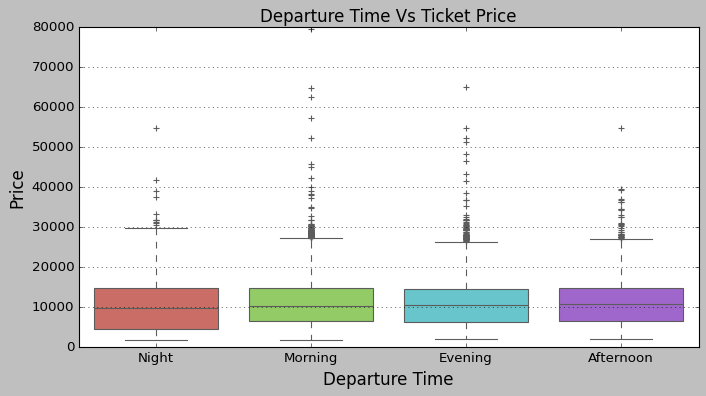

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(visible=None, which='major', axis='both')
sns.boxplot(x=df['Dep_Time'], y=df['Price'], hue=df['Dep_Time'], palette='hls', legend=False)
plt.title('Departure Time Vs Ticket Price',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

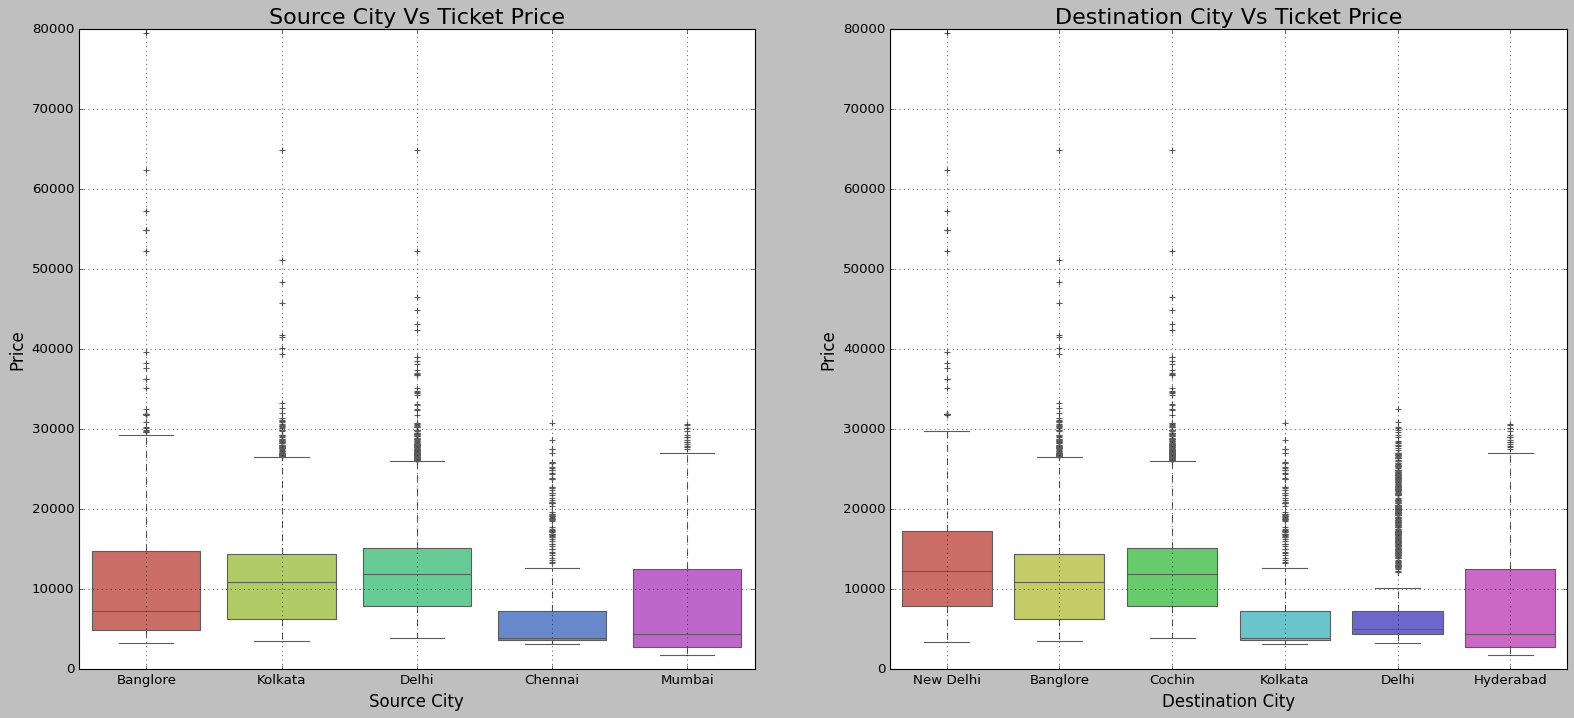

In [ ]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
sns.boxplot(x='Source', y='Price', hue='Source', data=df, palette='hls', legend=False)
plt.title('Source City Vs Ticket Price', fontsize=20)
plt.xlabel('Source City', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid(visible=None, which='major', axis='both')

plt.subplot(1,2,2)
sns.boxplot(x='Destination', y='Price', hue='Destination', data=df, palette='hls', legend=False)
plt.title('Destination City Vs Ticket Price', fontsize=20)
plt.xlabel('Destination City', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid(visible=None, which='major', axis='both')

plt.show()

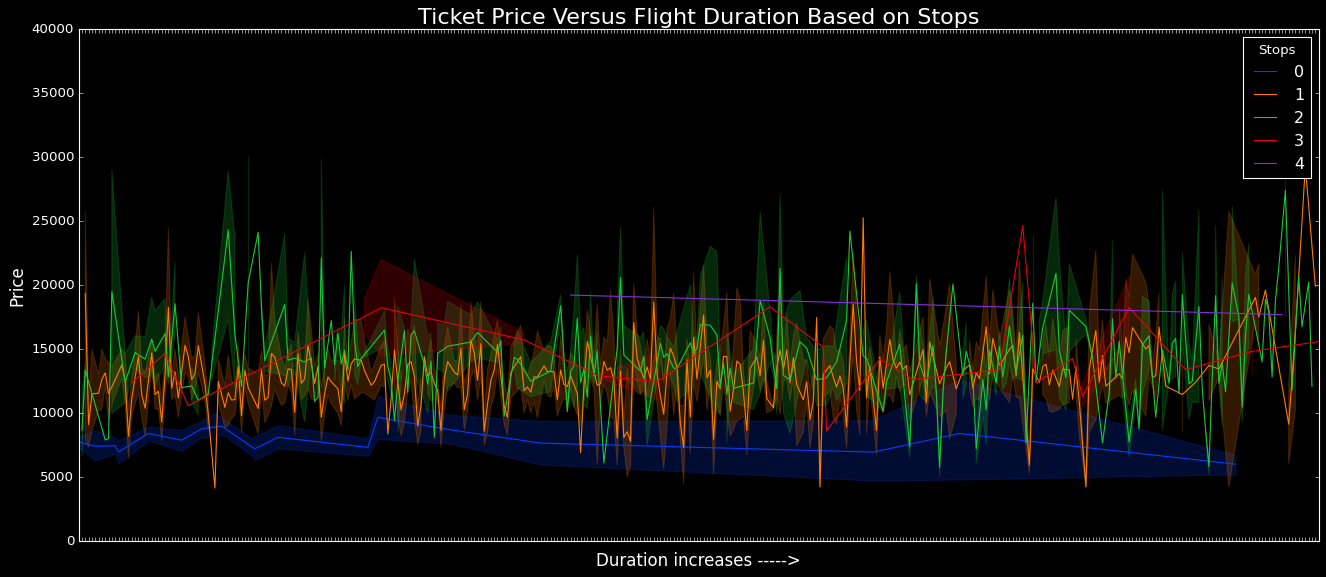

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Duration',y='Price',hue='Stops',palette='bright')
plt.title('Ticket Price Versus Flight Duration Based on Stops',fontsize=20)
plt.gca().set_xticklabels([])
plt.xlabel('Duration increases ----->',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
df = df.drop(['Airline','Source','Destination','Date_of_Journey','Dep_Time','Duration','Total_Stops','Year'],axis=1)
df.head()

,Price,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,3897,24,3,0,22,20,3,0,5
1,7662,1,5,2,5,50,1,3,0
2,13882,9,6,2,9,25,4,2,1
3,6218,12,5,1,18,5,3,3,0
4,13302,1,3,1,16,50,3,0,5


### Machine Learning

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(13353, 9)

In [ ]:
df_train = df[0:10600]
df_test = df[10600:]

In [ ]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
model.get_support(),model.get_params()

(array([ True,  True,  True,  True,  True,  True,  True,  True]),
 {'estimator__alpha': 0.005,
  'estimator__copy_X': True,
  'estimator__fit_intercept': True,
  'estimator__max_iter': 1000,
  'estimator__positive': False,
  'estimator__precompute': False,
  'estimator__random_state': 0,
  'estimator__selection': 'cyclic',
  'estimator__tol': 0.0001,
  'estimator__warm_start': False,
  'estimator': Lasso(alpha=0.005, random_state=0),
  'importance_getter': 'auto',
  'max_features': None,
  'norm_order': 1,
  'prefit': False,
  'threshold': None})

In [ ]:
features_selected = X_train.columns[model.get_support()]

In [ ]:
features_selected,X_train.shape,len(features_selected)

(Index(['Day', 'Month', 'Stops', 'Departure_Hour', 'Departure_Minute',
        'Airline_Encoded', 'Source_Encoded', 'Destination_Encoded'],
       dtype='object'),
 (7420, 8),
 8)

We see that year feature is not selected so we will eliminate Year feature from our dataset

In [ ]:
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
4003,1,5,1,16,30,4,3,0
217,1,6,0,1,30,3,0,2
1625,1,6,2,13,15,1,2,1
7636,9,5,0,13,55,1,4,4
4833,6,6,1,9,35,4,3,0


In [ ]:
X_test.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
5790,12,3,0,14,20,3,3,0
4340,1,6,0,11,40,2,0,2
3028,24,6,0,10,10,3,0,2
3037,18,5,0,19,35,3,1,3
8784,9,5,0,13,15,8,4,4


### Feature Normalization

In [ ]:
import scipy.stats as stat

In [ ]:
for x in list(X_train.columns):
    X_train[x] = stat.yeojohnson(X_train[x])[0]

for y in list(X_test.columns):
    X_test[y] = stat.yeojohnson(X_test[y])[0]


In [ ]:
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
4003,0.862230,17.150202,0.797617,8.702532,9.157704,2.366125,3.663566,0.000000
217,0.862230,23.469580,0.000000,0.887074,9.157704,1.927017,0.000000,0.955575
1625,0.862230,23.469580,1.376379,7.437352,6.011303,0.813911,2.328746,0.634250
7636,5.028138,17.150202,0.000000,7.437352,13.004746,0.813911,5.078516,1.315014
4833,3.726570,23.469580,0.797617,5.606341,10.025547,2.366125,3.663566,0.000000


In [ ]:

X_test.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
5790,6.275866,7.582048,0.0,7.442395,7.461310,1.919129,3.761781,0.000000
4340,0.865209,24.399888,0.0,6.225826,11.375691,1.417918,0.000000,0.944524
3028,10.205492,24.399888,0.0,5.797441,4.777318,1.919129,0.000000,0.944524
3037,8.361571,17.763228,0.0,9.296505,10.504280,1.919129,1.107530,1.147127
8784,5.094629,17.763228,0.0,7.047154,6.221616,3.733082,5.241874,1.293326


### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

<Axes: xlabel='Price', ylabel='Density'>

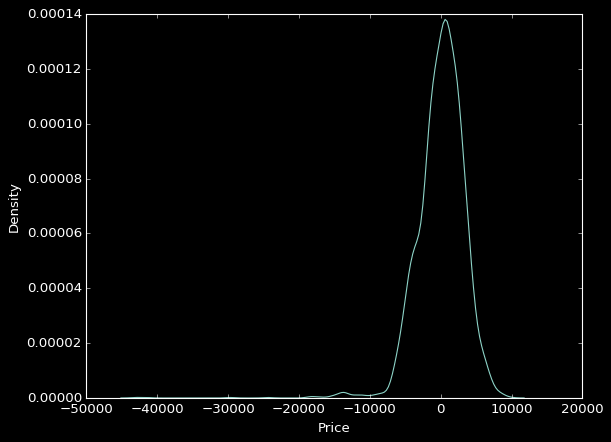

In [ ]:
sns.kdeplot(x=predictions-y_test)

In [ ]:
r2_score(y_true=y_test,y_pred=predictions)

0.44393013913511736

As we can see that r2 score is fair if not the best and other algos can also be applied which wil eventually make r2_score significantly better than regression but since we were doing regression project we will limit to this algo this time and will explore other algos later.

In [ ]:
lm.coef_

array([-223.98312582,  -98.49584179, 6474.33212074,   96.45467074,
        -37.41287473,  502.70149407, -337.34527857,   96.06799341])

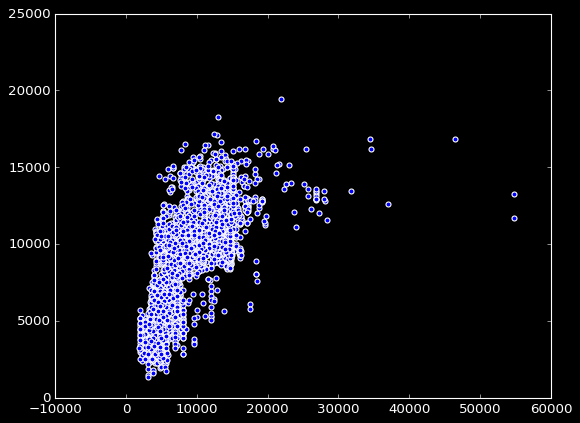

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
y_test

,Price
5790,4148
4340,3898
3028,3943
3037,3597
8784,2227
...,...
4320,7888
1977,8479
916,16775
8800,16023


In [ ]:
predictions

array([ 5248.61901372,  5648.03382491,  4013.47181653, ...,
       13061.01268055, 11986.76246027, 10129.74856929])

In [ ]:
lm.score(X_train,y_train)

0.453314226107682

Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
tr_score=reg.score(X_train,y_train)
print("Train R^2 Score:", tr_score)
train_accuracy_percentage = tr_score * 100
formatted_accuracy = f"{train_accuracy_percentage:.2f}%"

print(f"Train Accuracy is: {formatted_accuracy}")

Train R^2 Score: 0.9208990256678974
Train Accuracy is: 92.09%


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
tt_score=r2_score(y_true=y_test,y_pred=y_pred)
print("Test R^2 Score:", tt_score)
test_accuracy_percentage = tt_score * 100
formatted_accuracy = f"{test_accuracy_percentage:.2f}%"

print(f"Test Accuracy is: {formatted_accuracy}")

Test R^2 Score: 0.7706698539525001
Test Accuracy is: 77.07%


Extra Trees Regressor Model

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()

In [ ]:
etr.fit(X_train,y_train)
train_score=etr.score(X_train,y_train)
print("Train R^2 Score:", train_score)
train_accuracy_per = train_score * 100
formatted_acc = f"{train_accuracy_per:.2f}%"

print(f"Train Accuracy is: {formatted_acc}")

Train R^2 Score: 0.9312847899913533
Train Accuracy is: 93.13%


In [ ]:
y_pred = etr.predict(X_test)

In [ ]:
test_score=r2_score(y_true=y_test,y_pred=y_pred)
print("Test R^2 Score:", test_score)
test_accuracy_perc = test_score * 100
formatted_accr = f"{test_accuracy_perc:.2f}%"

print(f"Test Accuracy is: {formatted_accr}")

Test R^2 Score: 0.7777632631305172
Test Accuracy is: 77.78%


In [ ]:
print("End of File")

End of File
